Table of Contents:<a id="TOC"></a>

* [1. Introduction](#Introduction)

    * [1.1 Background](#Background)
    * [1.2 Problem Statement](#PS)
    * [1.3 Objective](#Objective)
    * [1.4 Data Dictionary](#Dict)

* [2. Python Libraries](#PL)

    * [2.1 Import Libraries & Ignore Warnings](#IL)
    
* [3. Data Preprocessing(1)](#DP)

    * [3.1 Data Reading](#DR)
    * [3.2 Data Inspection and Analysis](#DIA)
    * [3.3 Feature Transformation ](#FT)
  
  
* [4. Exploratory Data Analysis (EDA)](#EDA)
    
    * [4.1 Univariate Analysis](#UA)
    * [4.2 Multivariate Analysis](#BA)
    
* [5. Strategy](#S)

    * [5.1 Feature Selection](#FS)
    * [5.2 Outlier Treatment](#OT)

* [6. Data Preprocessing (2)](#DP)

    * [6.1 Feature Scaling](#FS)
    * [6.2 Hopkins Test](#HT)
    
* [7. K-Means Clustering Model](#KC)

    * [7.1 The Elbow Method](#EM)
    * [7.2 K-Means Algorithm](#KA)
    * [7.3 Visualization of Clustering Result](#VCR)
    
* [8. Findings & Conclusion](#F&C)

    * [8.1 Results](#RS)
    * [8.2 Recommendations](#RM)
    

    
    



### 1. Introduction <a class="anchor" id="Introduction"></a>

### 1.1 Background <a class="anchor" id="Background"></a>

   HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural 
    calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

### 1.2 Problem Statement <a class="anchor" id="PS"></a>

   After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.
   

### 1.3 Objective <a class="anchor" id="Objective"></a>

   To categorize/segment countries using socio-economic and health factors to identify which countries need financial assistance the most.

    

### 1.4 Data Dictionary <a class="anchor" id="Dict"></a>

  * country : Name of the country
  * child_mort : Death of children under 5 years of age per 1000 live births
  * exports : Exports of goods and services per capita. Given as %age of the GDP per capita
  * health : Total health spending per capita. Given as %age of GDP per capita
  * imports : Imports of goods and services per capita. Given as %age of the GDP per capita
  * income : Net income per person
  * inflation : The measurement of the annual growth rate of the Total GDP
  * life_expec : The average number of years a new born child would live if the current mortality patterns are to     remain the same
  * total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same
  * gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population
  
  
  
  



   [Back to TOC](#TOC)

### 2. Python Libraries <a class="anchor" id="PL"></a>

### 2.1 Import Libraries and Ignore Warnings <a class="anchor" id="IL"></a>

In [1]:
# DATA ANALYSIS AND VISUALIZATION LIBRARIES
import pandas as pd
import numpy as np
import pandas as pd
from random import sample
from numpy.random import uniform
from math import isnan
import seaborn as sns
import matplotlib.pyplot as plt


# MACHINE lEARNING LIBRARIES
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

   [Back to TOC](#TOC)

### 3. Data Preprocessing<a class="anchor" id="DP"></a>


In [2]:
# IMPORTING EXCEL FILES
country_df = pd.read_excel("/Users/janiceafigbedemah/Desktop/DATA SCIENCE/DATASETS/Country-data.xls")

### 3.1 Data Reading<a class="anchor" id="DR"></a>

In [3]:
country_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


### 3.2 Data Inspection<a class="anchor" id="DIA"></a>

In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
country_df.duplicated().sum()

0

In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<div class="alert alert-info">Observation: The data has no missing values nor duplicates.</div>


### 3.2 Feature Transformation<a class="anchor" id="FT"></a>

   According to the data dictionary, imports, exports and health are represented as percentages of GDP per capita. Using these figures for further analysis can skew results. It can give the impression that certain countries spend similar amounts on health such as Australia and Afghanistan(8.73% and 7.58%). However, this is inaccurate especially when their respective GDP per capita are far apart, hence the need to convert them into their actual values.

In [8]:
country_df['exports'] = (country_df['exports']/100) * country_df['gdpp']
country_df['imports'] = (country_df['imports']/100) * country_df['gdpp']
country_df['health'] = (country_df['health']/100) * country_df['gdpp']
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


   [Back to TOC](#TOC)

### 4. Exploratory Data Ananlysis<a class="anchor" id="EDA"></a>

   It is the process of performing initial investigation and analyses to understand the data by discovering trends, spotting anomalies and checking assumptions by using statistical summaries and data visualizations.

### 4.1 Univariate Analysis<a class="anchor" id="UA"></a>

   In Univariate Analysis, only one variable is analyzed at a time. This analysis is used to describe the data and find patterns that exist within it.

In [9]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<div class="alert alert-info">Observation:  From the table above, we can already tell that "child_mort","incmome"and"gdpp" are greatly skewed and have asymmetrical distribution. This is because their mean and median are very far apart.</div>

In [10]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
features =['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

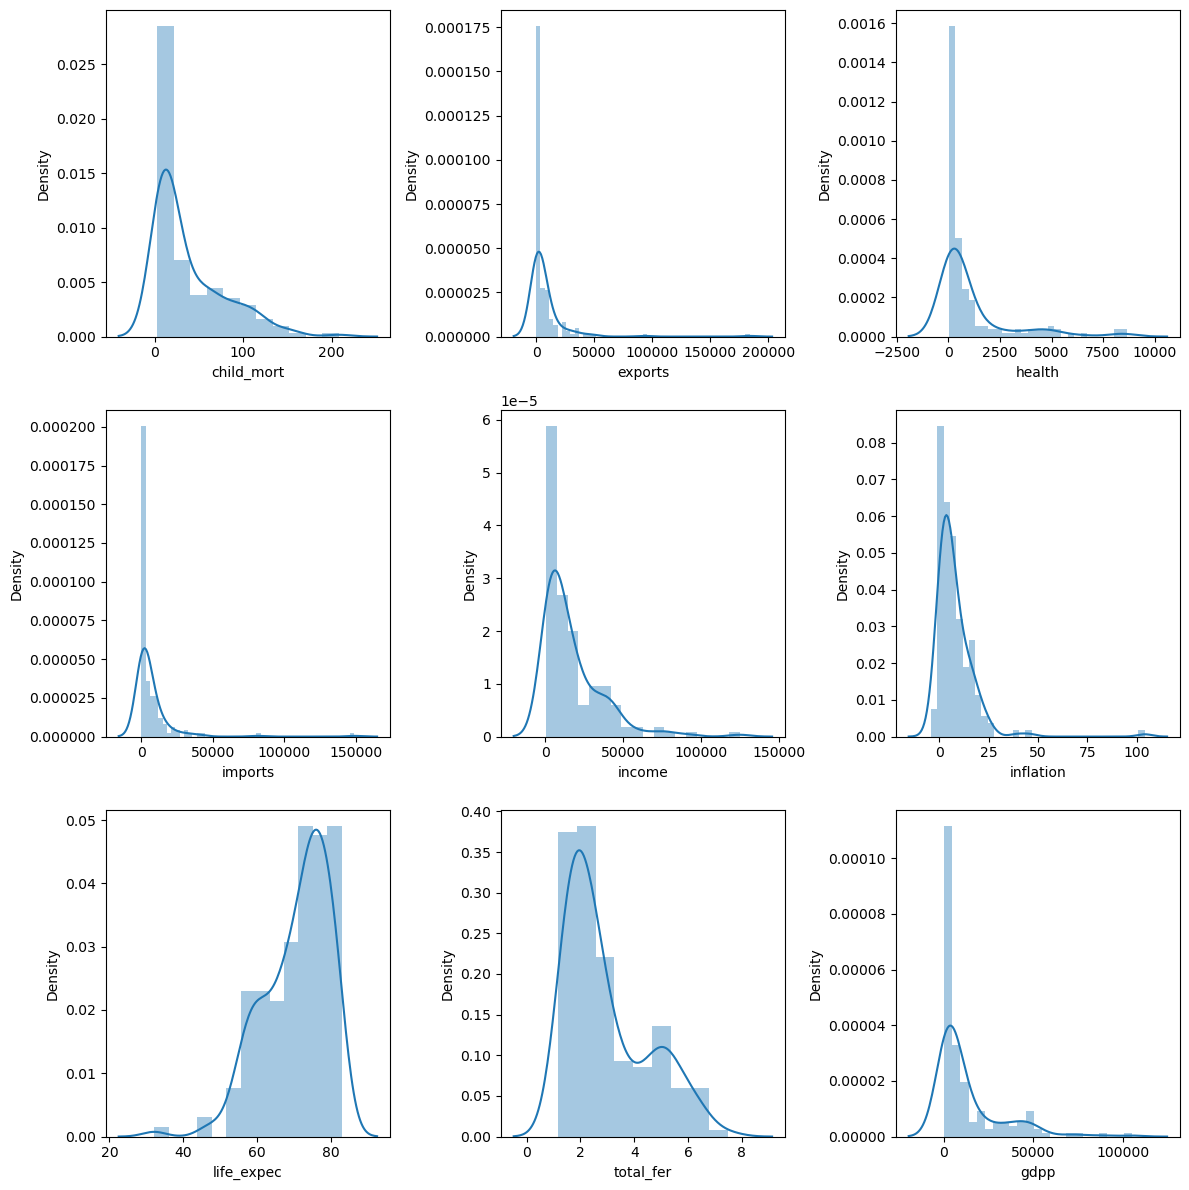

In [12]:
plt.figure(figsize=(12,12))
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(country_df[i[1]])
    plt.xticks(rotation=0)
    plt.tight_layout()

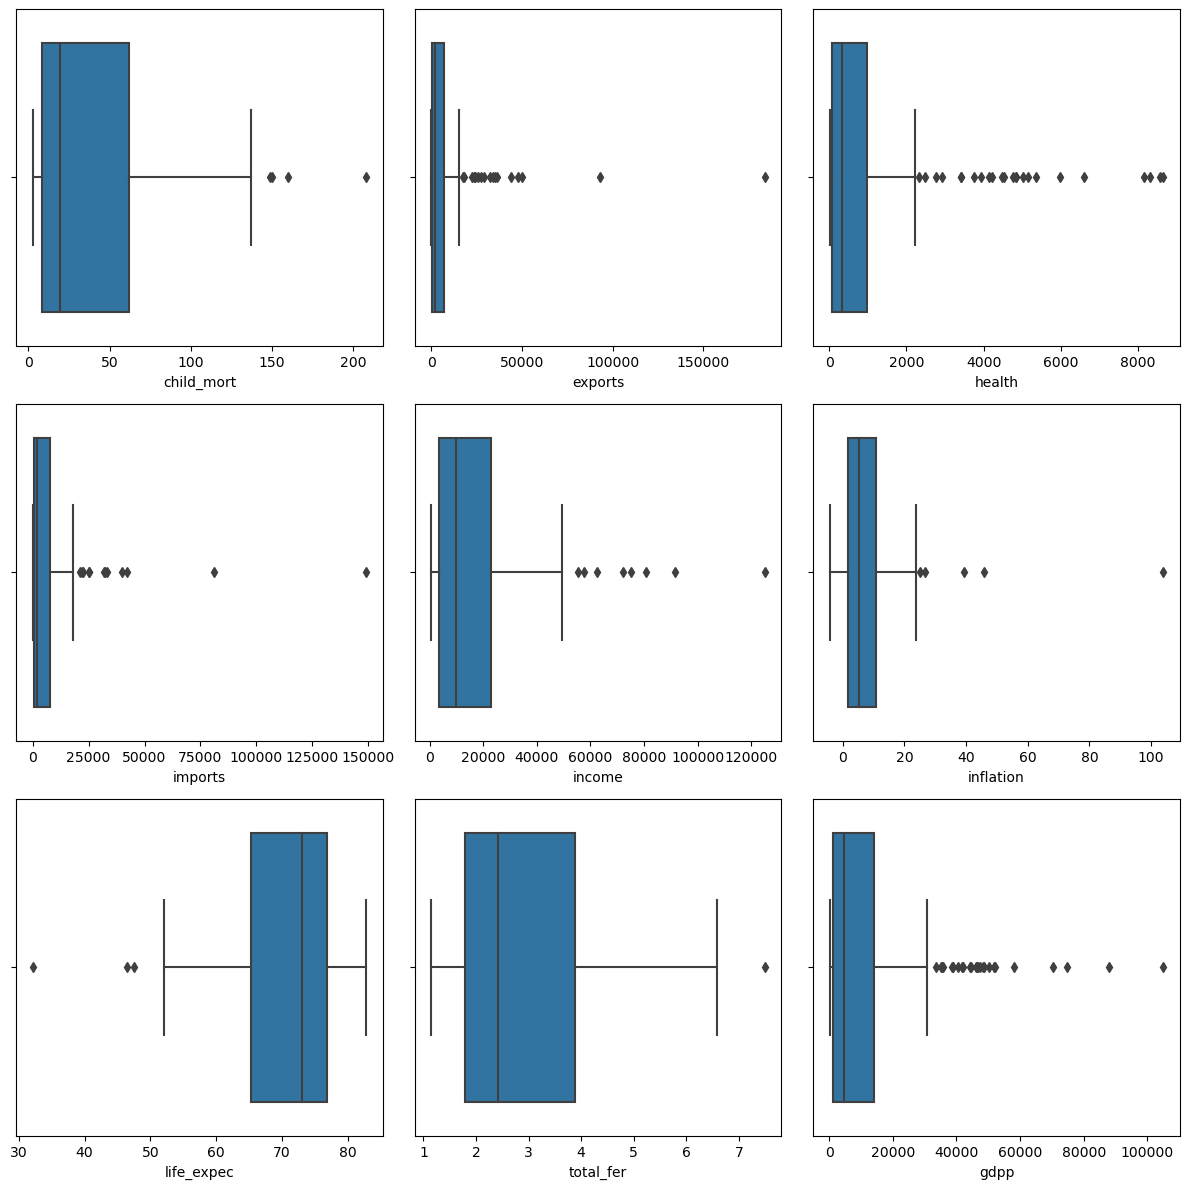

In [13]:
plt.figure(figsize=(12,12))
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x=country_df[i[1]])
    plt.xticks(rotation=0)
    plt.tight_layout()

<div class="alert alert-info">OBSERVATIONS FROM UNIVARIATE ANALYSIS: <br>
    <br>
    * Child Mortality, Exports, Imports, Income, Inflation and GDP per capita are all highly skewed to the right (positively-skewed) and have several outliers<br>
    <br>
    * Health and Total fertility are also positively skewed.<br>
    <br>
    * Life expectancy is negatively skewed (left-skewed) with a few outliers</div>


### 4.2 Multivavariate Analysis<a class="anchor" id="BA"></a>

   In Multivariate Analysis, more than two different variables are analyzed. This analysis deals with causes and relationships and the analysis is done to find out the relationship between the variables.

<Figure size 1400x900 with 0 Axes>

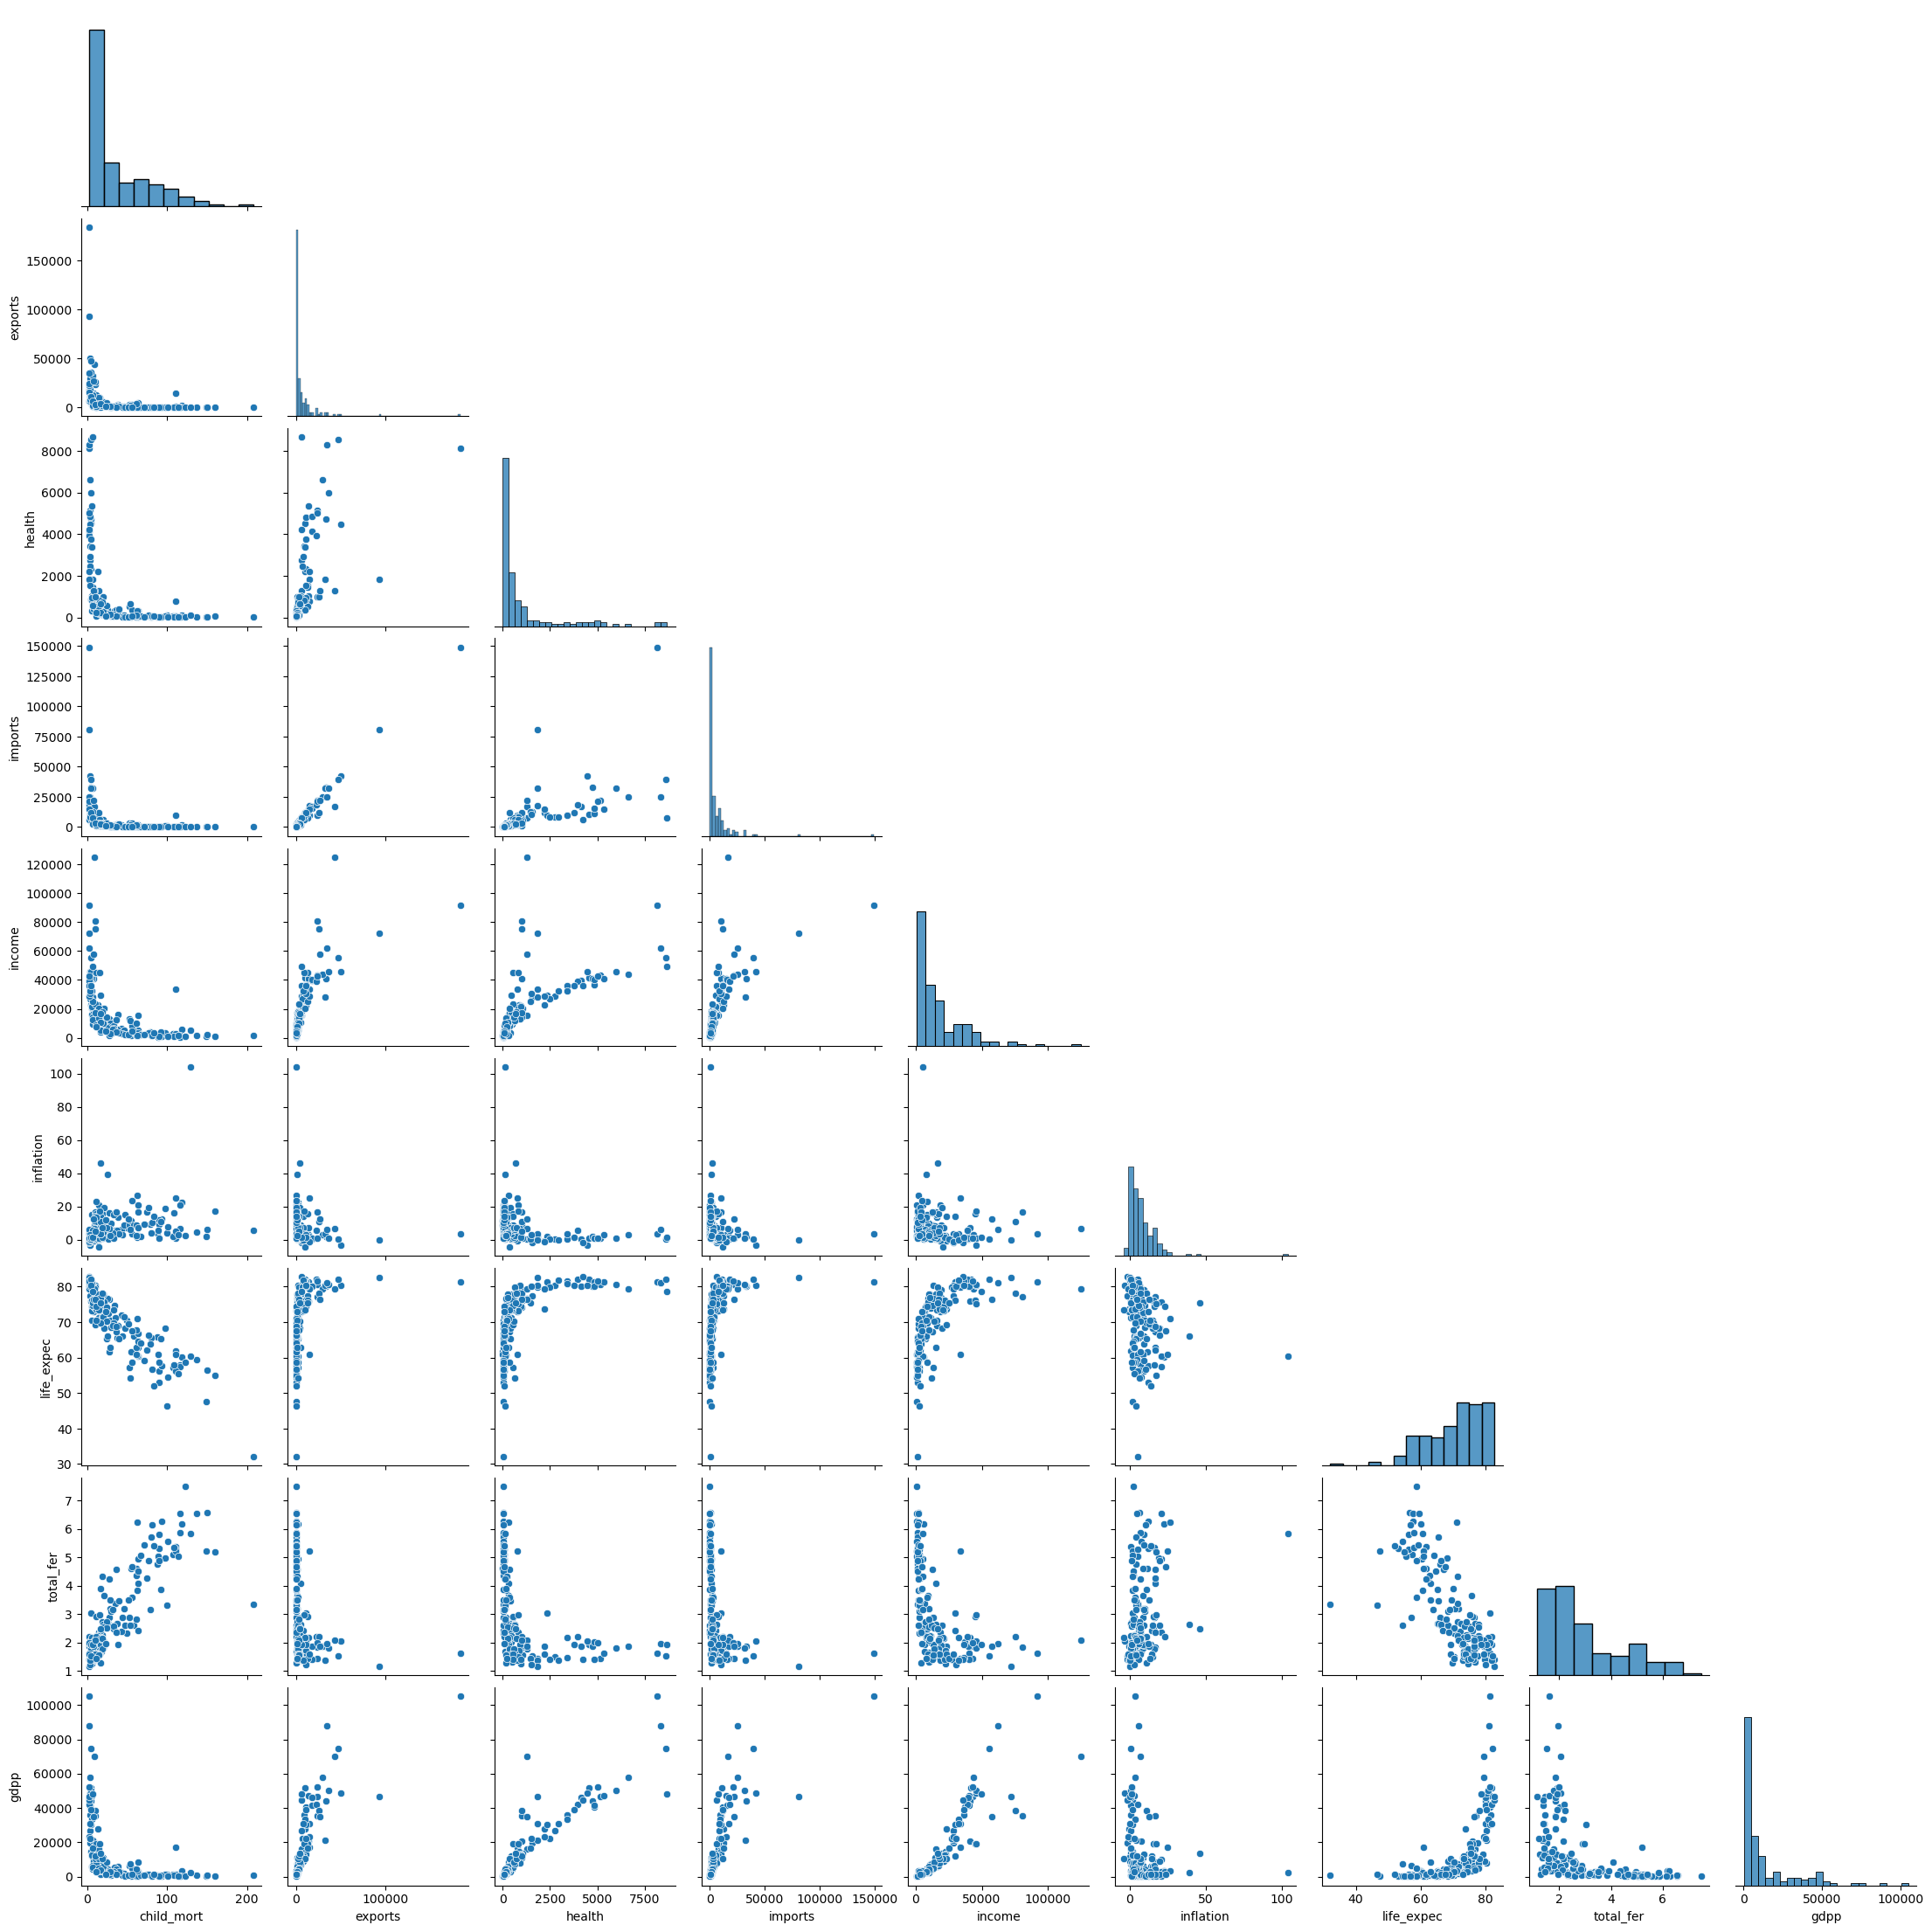

In [14]:
plt.figure(figsize=(14,9))
sns.pairplot(country_df, corner=True)
plt.show()

In [15]:
country_df2 = country_df.drop(columns=['country'], errors='ignore')

<Axes: >

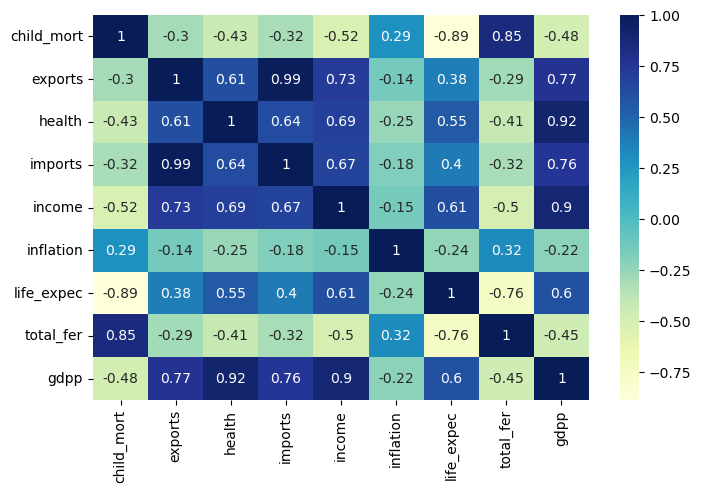

In [16]:
# Heatmap to determine the correlation between the features.
plt.figure(figsize=(8,5))
sns.heatmap(country_df2.corr(), annot = True, cmap="YlGnBu", )

In [17]:
##To find the degree of the relationship amongst the variables, a correlation function is used
country_df2.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


<div class="alert alert-info">OBSERVATIONS FROM MULTIVARIATE ANALYSIS: <br>
    <br>
    
* Child mortality and life expectancy : strong negative correlation<br>    
* life expectancy and total fertility : strong negative correlation <br>
* child mortality and total fertility : strong positive correlation<br>
* Exports, GDP Imports and Income.    : moderate to strong positive correlation<br>
* Health and GDP                      : Strong positive correlation</div>


   [Back to TOC](#TOC)

### 5. Strategy<a class="anchor" id="S"></a>

  The above analysis has provided some insight into the relationships of the variables. Hence, the next steps involve selecting the right features to perform clustering analysis then treating the outliers for these features

### 5.1 Feature Selection<a class="anchor" id="FS"></a>

   Based on the objective, we are to select countries in need based on socio-economic and health factors. Therefore, we need to know what features/variables fall under these factors.
   
   | Health Factors| Socio-Economic Factors |
   | :-------------| ---------------------: |
   | Child Mortality | Exports              | 
   | Health.         | Imports              |
   | Total Fertility | Income               |
   | Life Expectancy | Inflation            |
   |                 | GDP Per Capita       |

<div class="alert alert-warning">Approach <br>
    <br>
    1. Health Factor of choice is Child Mortality:<br>
    <br>
    The weak correlation between healthcare expenditure and the other health factors (Child Mortality, Total Fertility, and Life Expectancy) suggests that the healthcare funds may not be reaching the areas that have the greatest impact on child mortality and the other health factors.<br>
    <br>
    Child mortality, influenced by various determinants of health and environmental factors such as sanitation, poverty and nutrition is a better indicator for financial assistance. By targeting child mortality, HELP International can address both healthcare needs and broader social determinants of health, aligning with the goal of fighting poverty. Moreover, child mortality correlates with other health factors such as total fertility and life expectancy, making it a comprehensive measure to improve population health.<br>
    <br>
    2. Socio-Economic Factor of Choice is Income: <br>
    <br>
    Inflation has a weak correlation with the other socio-economic factors because its influence is indirect and mediated by various economic and social factors such as monetary policy decisions, fiscal measures, and supply-demand dynamics within an economy. Income, on the other hand, provides a more comprehensive understanding of individuals' economic well-being by considering non-trade-related factors and domestic economic impact. It captures income disparities, poverty rates, and ability to access essential services, making it a more holistic indicator for financial assistance targeting socio-economic conditions.</div>


### 5.2 Outlier Treatment<a class="anchor" id="OT"></a>
   
   From the box plots in the univariate analysis, both child mortatlity and income have outliers and are skewed to the right. In treating these outliers, we would refrain from the deletion method since this would exclude countries that are in the direst need of aid. Hence, there would be no outlier tratment for Child Mortality.
   
   For Income, we are more focused on countries with low income per person so we would adopt the winorization method or percentile capping to treat the high values. Hence, we would cap at the 95th percentile which means that values that are greater than the value at 95th percentile are replaced by the value of the 95th percentile. 
   

In [26]:
# Determine the 95th percentile (upper bound)
upper_bound = np.percentile(country_df['income'], 95)

In [27]:
# Apply winsorization: Cap only the upper extreme values
country_df['income_winsorized'] = np.where(country_df['income'] > upper_bound, upper_bound, country_df['income'])

In [28]:
#  Check the max value before and after winsorization
print(country_df[['income', 'income_winsorized']].describe())

              income  income_winsorized
count     167.000000         167.000000
mean    17144.688623       15738.760479
std     19278.067698       14787.154215
min       609.000000         609.000000
25%      3355.000000        3355.000000
50%      9960.000000        9960.000000
75%     22800.000000       22800.000000
max    125000.000000       48290.000000


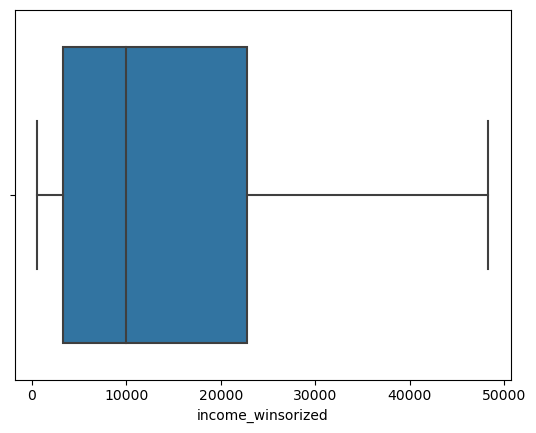

In [29]:
## Checking for outliers after capping
sns.boxplot(data=country_df, x="income_winsorized")
plt.show()

   [Back to TOC](#TOC)

### 6. Data Preprocessing (2)<a class="anchor" id="DP"></a>

   Now that the features have been selected and outliers treated, we can go ahead and prepare and test the data for clustering.

### 6.1 Feature Scaling<a class="anchor" id="FS"></a>

    
   The scales for the selected features are different hence the need to adjust the values and put them on a common scale.

In [30]:
df = country_df[['country','child_mort','income_winsorized']]

In [31]:
cluster_df = country_df[['country','child_mort','income_winsorized']].set_index('country')
features = cluster_df.columns 
cluster_df 

,child_mort,income_winsorized
country,,
Afghanistan,90.2,1610.0
Albania,16.6,9930.0
Algeria,27.3,12900.0
Angola,119.0,5900.0
Antigua and Barbuda,10.3,19100.0
...,...,...
Vanuatu,29.2,2950.0
Venezuela,17.1,16500.0
Vietnam,23.3,4490.0


In [32]:
## Scale the features in the new dataframe
scale=StandardScaler()  # INITIALIZE
cluster_df_scaled= pd.DataFrame(scale.fit_transform(cluster_df))    ## fit the data to be studied by the algorithmb
cluster_df_scaled.columns=features 
cluster_df_scaled.head()

,child_mort,income_winsorized
0,1.291532,-0.958349
1,-0.538949,-0.394006
2,-0.272833,-0.192552
3,2.007808,-0.667360
4,-0.695634,0.227992


### 6.2 Hopkins Test<a class="anchor" id="HT"></a>

   The hopkins test is a way to measure the clusterability of a dataset to ascertain if there are any meaningful clusters. 
   <br>
   NB: A uniformly distributed dataset can still be clustered but with no meaningful clusters hence the neccesity of hopkins test
    

In [33]:
def hopkins(X):
    d = X.shape[1] ## Length of colums
    n = X.shape[0] ## length of rows
    m = int(0.1 * n) # size of the randomly sampled dataset
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        
        #draw uniformly from the space that is strechted from the least point to the maximum point & Calculate their distance to the nearest neighbor
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        
        # generate another random sample from the sample itself & Calculate the distance to the nearest neigbor
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(cluster_df_scaled)

0.9214065503076995

<div class="alert alert-warning">RESULTS: <br>
    <br>
The hopkins statistic value of 0.92 indicates that the data set has a high clustering tendency</div>


   [Back to TOC](#TOC)

### 7. The K-Means Clustering Model<a class="anchor" id="KC"></a>

K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

### 7.1 The Elbow Method<a class="anchor" id="EM"></a>

Used to decide on the optimal number of clusters to use

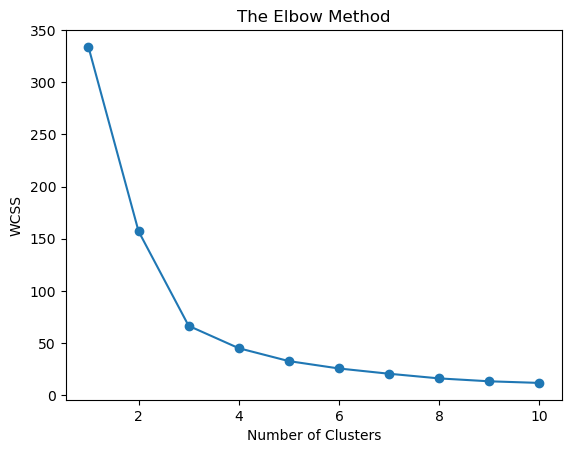

In [35]:
inertia_scores=[]    ## create an empty list to put all the inertia scores in once calculated
for i in range(1,11):   ## For each cluster in a range of 1 to 10,
    kmeans=KMeans(n_clusters=i, random_state=42) ### Initialize the algorithm
    kmeans.fit(cluster_df_scaled[['child_mort','income_winsorized']])  ## Fit the data to be studied by the algorithm
    inertia_scores.append(kmeans.inertia_)     ### append the calculated WCSS to inertia scores that was created
    
plt.plot(range(1,11), inertia_scores, marker='o')
plt.title('The Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()

In [36]:
k=KneeLocator(range(1,11), inertia_scores, curve='convex', direction='decreasing')
k.elbow

3

### 7.2 The K-Means Algorithm<a class="anchor" id="KA"></a>

In [37]:
## With our chosen cluster, we can input it into the KMeans algorithm
kmeans=KMeans(n_clusters=3, random_state=50) ## initialize algorithm with optimal clusters
kmeans.fit(cluster_df_scaled)
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [38]:
# Assign clustering result to each country in the data frame
cluster_df['Cluster Label']=kmeans.labels_
cluster_df

,child_mort,income_winsorized,Cluster Label
country,,,
Afghanistan,90.2,1610.0,0
Albania,16.6,9930.0,2
Algeria,27.3,12900.0,2
Angola,119.0,5900.0,0
Antigua and Barbuda,10.3,19100.0,2
...,...,...,...
Vanuatu,29.2,2950.0,2
Venezuela,17.1,16500.0,2
Vietnam,23.3,4490.0,2


In [39]:
cluster_df['Cluster Label'].value_counts(ascending=True)

Cluster Label
1    39
0    41
2    87
Name: count, dtype: int64

### 7.3 Visualization of Clustering Results<a class="anchor" id="VCR"></a>

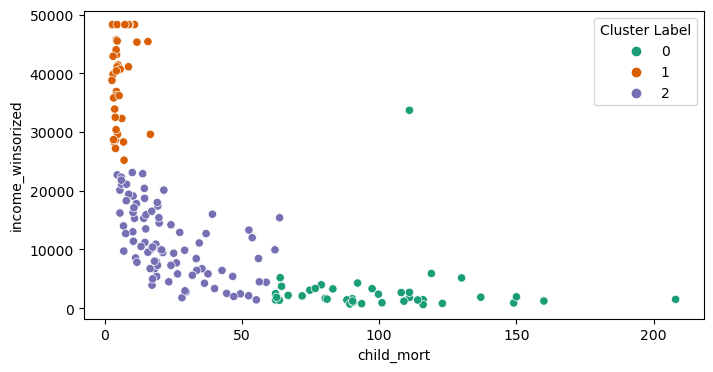

In [49]:
### Visualize to better understand clustering result
plt.figure(figsize=(8,4))
sns.scatterplot(data=cluster_df, x='child_mort',y='income_winsorized',hue='Cluster Label', palette="Dark2")
plt.show()

 
                             On a development scale, the clusters can be classified into:
   
   
   | Color        | Cluster Label.         | Development scale          | 
   | :-------------| ---------------------  |-------------------------: |
   | Green.        |       0                | Under Developed Countries       |
   | Orange        |       1                | Developed Countries |
   | Purple.       |       2                | Developing Countries      |
 
   

   [Back to TOC](#TOC)

### 8. Findings & Conclusions<a class="anchor" id="F&C"></a>


### 8.1 Results<a class="anchor" id="RS"></a>

   According to the clusters above, the countries in the most need of financial assistance are those in Cluster 0 (Under-developed Countries). 

In [41]:
Underdeveloped = cluster_df[cluster_df['Cluster Label'] == 0]
Underdeveloped.head(5)

,child_mort,income_winsorized,Cluster Label
country,,,
Afghanistan,90.2,1610.0,0
Angola,119.0,5900.0,0
Benin,111.0,1820.0,0
Burkina Faso,116.0,1430.0,0
Burundi,93.6,764.0,0


### 8.1 Recommendations<a class="anchor" id="RM"></a>

   Since Cluster 0 has 41 countries, we will narrow the selection down to the top 10 countries that need financial assistance the most. That is, countries with the highest child mortality rates and those with the lowest income levels.

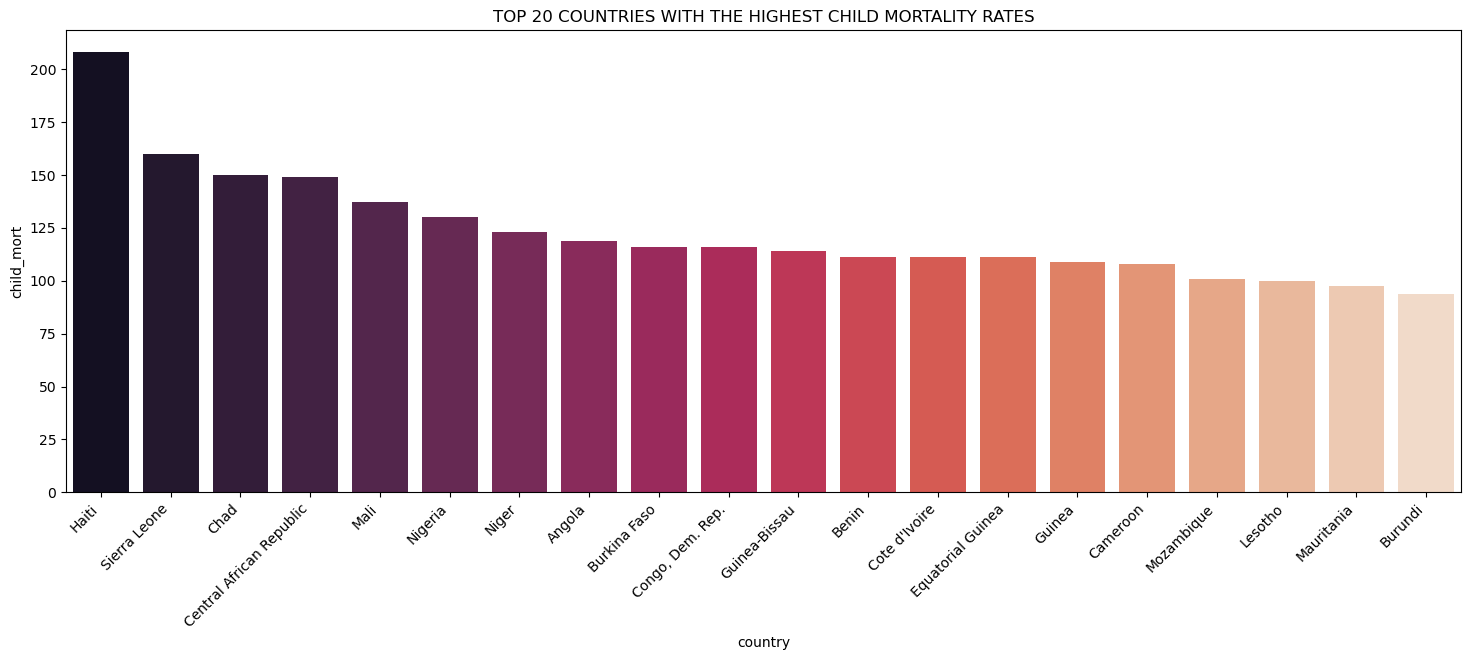

In [44]:
plt.figure(figsize=(18,6))
sns.barplot(x = "country",
            y='child_mort',
            palette="rocket",
            data=Underdeveloped.reset_index().nlargest(20, 'child_mort'))
plt.title("TOP 20 COUNTRIES WITH THE HIGHEST CHILD MORTALITY RATES")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()       

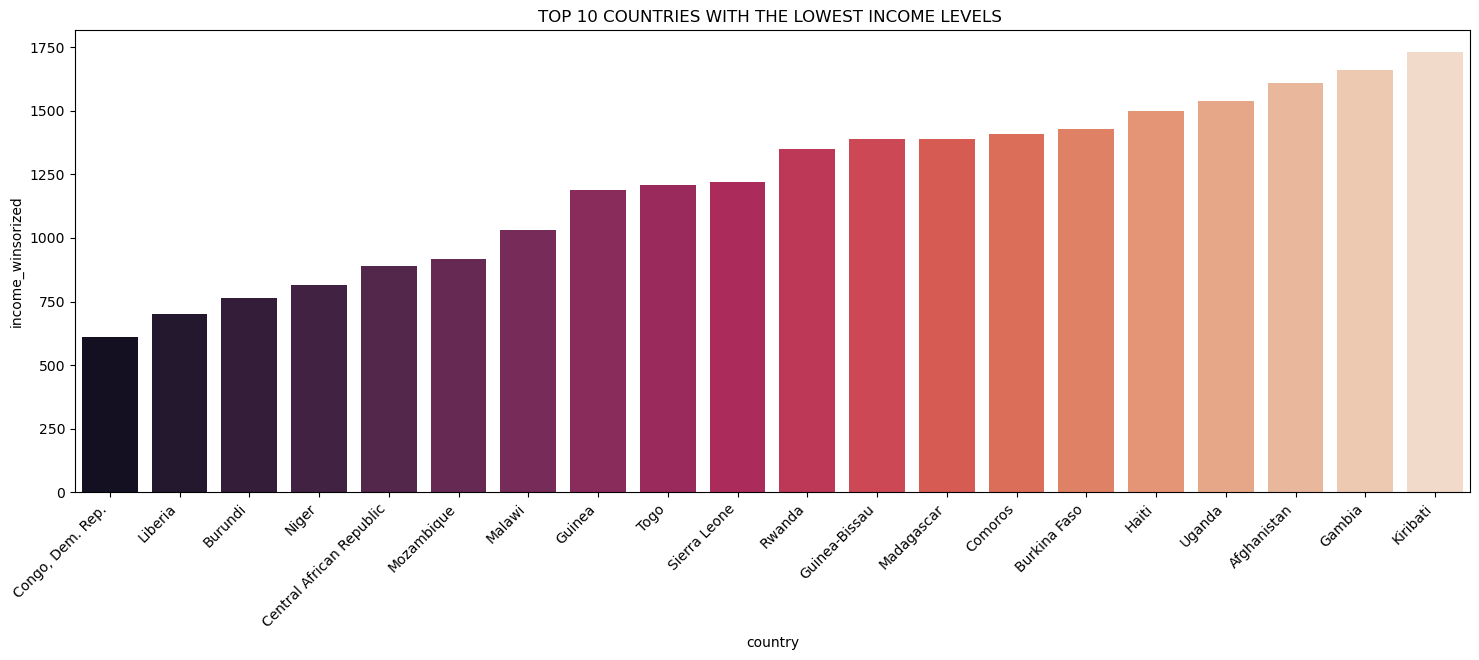

In [47]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', 
            y='income_winsorized',
            palette="rocket",
            data=Underdeveloped.reset_index().nsmallest(20, 'income_winsorized'))
plt.title("TOP 10 COUNTRIES WITH THE LOWEST INCOME LEVELS ")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()
        

In [43]:
# Rank countries in cluster 0 based on child mortality and income levels combined
Underdeveloped['rank'] = (Underdeveloped['income_winsorized'].rank(ascending=True) + Underdeveloped['child_mort'].rank(ascending=False)).rank()
Underdeveloped["rank"].nsmallest(10)

country
Central African Republic     1.0
Congo, Dem. Rep.             2.0
Niger                        3.0
Sierra Leone                 4.0
Haiti                        5.0
Burundi                      7.0
Guinea                       7.0
Mozambique                   7.0
Guinea-Bissau                9.0
Burkina Faso                10.0
Name: rank, dtype: float64

<div class="alert alert-success">THE TOP 10 COUNTRIES RANKED ACCORDING TO THOSE IN NEED OF THE MOST FINANCIAL ASSISTANCE ARE : <br>
    <br>

1. CENTRAL AFRICAN REPUBLIC
2. CONGO DEM. REPUBLIC
3. NIGER
4. SIERRA LEONE
5. HAITI
6. BURUNDI
7. GUINEA
8. MOZAMBIQUE
9. GUINEA-BISSAU
10. BURKINA FASO
    

[Back to TOC](#TOC)